In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

import re

import json
import csv



In [2]:
# with open('E:/Lab/Project/VN Legal Dataset Benchmark/question_9.4_addtype1_fixType.json', encoding="utf8") as f:
#     data = json.load(f)
with open('E:/Lab/Project/VN Legal Dataset Benchmark/question_9.7_addtype2.json', encoding="utf8") as f:
    data = json.load(f)

In [4]:
# Assuming 'data' contains the JSON data you provided
number_of_entities = len(data)
print("Number of entities:", number_of_entities)

Number of entities: 16758


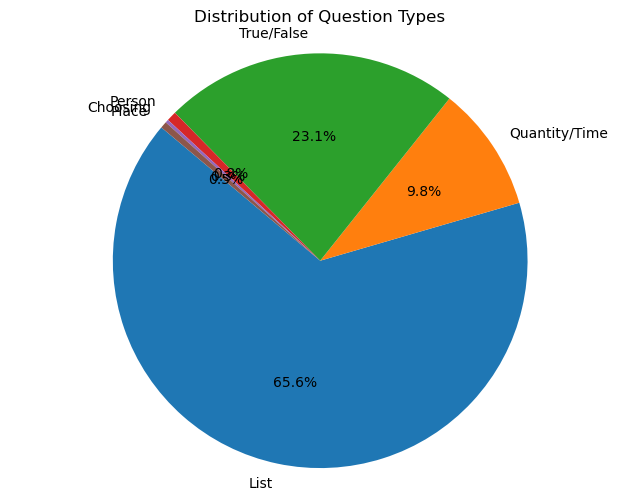

In [5]:
# Create a dictionary to store the count of each question_type
question_type_counts = {}

# Count the occurrences of each question_type
for item in data:
    question_type = item['question_type']
    if question_type in question_type_counts:
        question_type_counts[question_type] += 1
    else:
        question_type_counts[question_type] = 1

# Extract question types and their counts for the pie chart
question_types = list(question_type_counts.keys())
counts = list(question_type_counts.values())

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=question_types, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Question Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

Question with Maximum Length (ID: 2809 ): 48
Question with Minimum Length (ID: 2969 ): 6
Average Question Text Length: 19.881952733349248


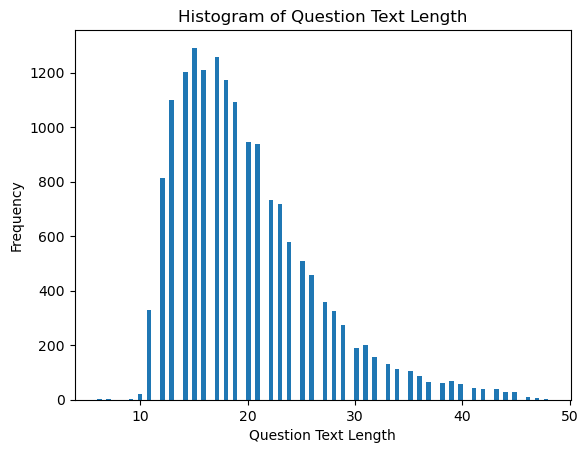

In [9]:
# Calculate the lengths of question texts and store them in a list
question_lengths = [len(item['question'].split()) for item in data]

# Calculate the maximum, minimum, and average question text length
max_length = max(question_lengths)
min_length = min(question_lengths)
avg_length = sum(question_lengths) / len(question_lengths)

# Find the ID of the question with the maximum length
max_length_question_id = data[question_lengths.index(max_length)]['id']

# Find the ID of the question with the minimum length
min_length_question_id = data[question_lengths.index(min_length)]['id']

# Print out the results including IDs
print("Question with Maximum Length (ID:", max_length_question_id, "):", max_length)
print("Question with Minimum Length (ID:", min_length_question_id, "):", min_length)
print("Average Question Text Length:", avg_length)

# Create a histogram of question text length
plt.hist(question_lengths, bins=100)
plt.xlabel('Question Text Length')
plt.ylabel('Frequency')
plt.title('Histogram of Question Text Length')
plt.show()

Answer with Maximum Length (ID: 8129 ): 687
Answer with Minimum Length (ID: 10537 ): 32
Average Answer Text Length: 304.727381236572


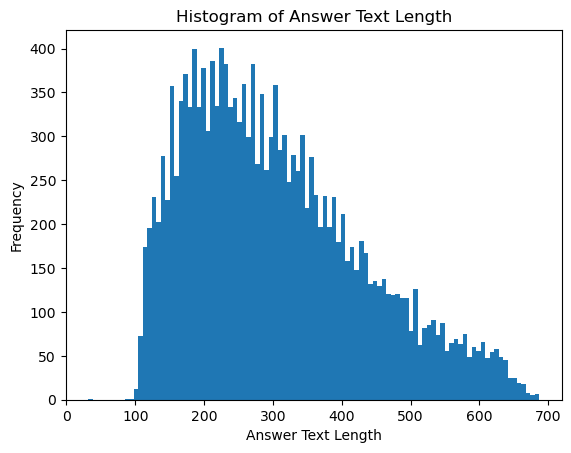

In [8]:
# Calculate the lengths of answer texts and store them in a list
answer_lengths = [len(item['answer'].split()) for item in data]

# Calculate the maximum, minimum, and average answer text length
max_length = max(answer_lengths)
min_length = min(answer_lengths)
avg_length = sum(answer_lengths) / len(answer_lengths)

# Find the ID of the answer with the maximum length
max_length_answer_id = data[answer_lengths.index(max_length)]['id']

# Find the ID of the answer with the minimum length
min_length_answer_id = data[answer_lengths.index(min_length)]['id']

# Print out the results including IDs
print("Answer with Maximum Length (ID:", max_length_answer_id, "):", max_length)
print("Answer with Minimum Length (ID:", min_length_answer_id, "):", min_length)
print("Average Answer Text Length:", avg_length)

# Create a histogram of answer text length
plt.hist(answer_lengths, bins=100)
plt.xlabel('Answer Text Length')
plt.ylabel('Frequency')
plt.title('Histogram of Answer Text Length')
plt.show()

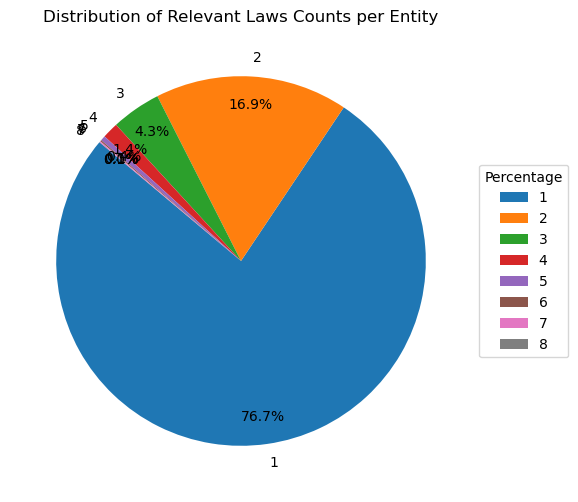

Entities with 1 relevant laws (12858 entities):
1, 2, 4, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 32, 34, 36, 38, 39, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 61, 63, 65, 66, 67, 68, 69, 70, 71, 73, 74, 76, 78, 79, 83, 84, 85, 86, 87, 88, 89, 92, 93, 94, 96, 97, 99, 100, 102, 103, 105, 106, 107, 109, 110, 111, 112, 113, 114, 115, 116, 117, 120, 121, 123, 124, 125, 126, 129, 130, 131, 132, 134, 137, 138, 139, 140, 141, 143, 144, 145, 147, 148, 149, 150, 151, 155, 156, 157, 158, 160, 164, 165, 166, 167, 168, 170, 171, 172, 173, 174, 176, 177, 179, 184, 188, 189, 190, 191, 193, 194, 197, 200, 203, 205, 206, 207, 208, 209, 210, 211, 212, 216, 217, 218, 219, 220, 222, 223, 224, 227, 228, 229, 230, 232, 234, 235, 237, 238, 240, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 255, 256, 258, 259, 260, 262, 265, 266, 267, 272, 273, 274, 275, 276, 278, 279, 280, 281, 282, 283, 285, 286, 289, 290, 293, 294, 296, 297, 298, 299, 300, 304, 308, 

In [14]:
# Count the number of relevant laws for each entity
relevant_laws_counts = [len(item['relevant_laws']) for item in data]

# Count the occurrences of each count value and store IDs
count_distribution = {}
for i, count in enumerate(relevant_laws_counts):
    if count in count_distribution:
        count_distribution[count]['count'] += 1
        count_distribution[count]['ids'].append(data[i]['id'])
    else:
        count_distribution[count] = {'count': 1, 'ids': [data[i]['id']]}

# Extract the counts and corresponding labels for the pie chart
law_counts = list(count_distribution.keys())
law_counts.sort()
frequency = [count_distribution[count]['count'] for count in law_counts]

# Create a pie chart with percentage values outside the chart
plt.figure(figsize=(8, 6))
plt.pie(frequency, labels=[f"{count}" for count in law_counts], autopct='%1.1f%%', startangle=140,
        pctdistance=0.85, labeldistance=1.1)
plt.title('Distribution of Relevant Laws Counts per Entity')

# Position the legend box outside of the chart
plt.legend(title="Percentage", loc="center left", bbox_to_anchor=(1, 0.5))

# Show the pie chart
plt.show()

# Print the count distribution and associated IDs
for count in law_counts:
    print(f"Entities with {count} relevant laws ({count_distribution[count]['count']} entities):")
    print(", ".join(map(str, count_distribution[count]['ids'])))
    print()

# Calculate the average law count
total_entities = len(data)
total_law_count = sum([count * count_distribution[count]['count'] for count in law_counts])
average_law_count = total_law_count / total_entities

# Print the average law count
print(f"Average law count per entity: {average_law_count:.2f}")

In [9]:
# Count the number of short_answer values that are empty
empty_short_answer_count = 0

for item in data:
    if item['short_answer'] == "":
        empty_short_answer_count += 1

print("Number of empty short_answer values:", empty_short_answer_count)

Number of empty short_answer values: 9424


Entity with Maximum Short Answer Length (ID: 6890 ): 2652
Entity with Minimum Short Answer Length (ID: 5277 ): 12
Average Short Answer Text Length: 329.36310335424054


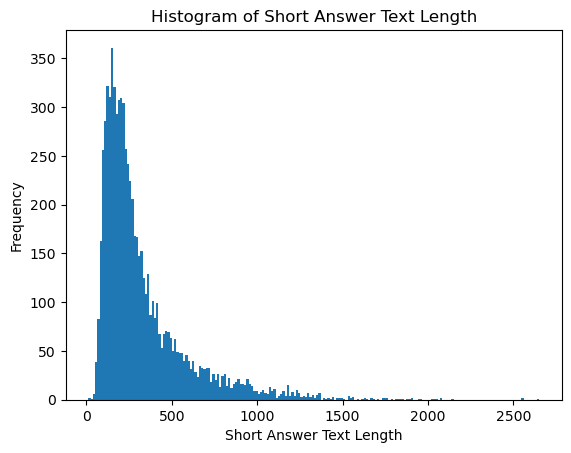

In [10]:
# Calculate the lengths of short_answer texts for entities that have a short_answer
short_answer_lengths = [len(item['short_answer']) for item in data if item['short_answer']]

# Calculate the maximum, minimum, and average short_answer text length
max_length = max(short_answer_lengths) if short_answer_lengths else 0
min_length = min(short_answer_lengths) if short_answer_lengths else 0
avg_length = sum(short_answer_lengths) / len(short_answer_lengths) if short_answer_lengths else 0

# Find the ID of the entity with the maximum short_answer length
max_length_entity_id = None
if short_answer_lengths:
    max_length_entity_id = data[short_answer_lengths.index(max_length)]['id']

# Find the ID of the entity with the minimum short_answer length
min_length_entity_id = None
if short_answer_lengths:
    min_length_entity_id = data[short_answer_lengths.index(min_length)]['id']

# Print out the results including IDs
print("Entity with Maximum Short Answer Length (ID:", max_length_entity_id, "):", max_length)
print("Entity with Minimum Short Answer Length (ID:", min_length_entity_id, "):", min_length)
print("Average Short Answer Text Length:", avg_length)

# Create a histogram of short_answer text length
plt.hist(short_answer_lengths, bins=200)
plt.xlabel('Short Answer Text Length')
plt.ylabel('Frequency')
plt.title('Histogram of Short Answer Text Length')
plt.show()

Entity with Maximum Text Length (ID: 11017 ): 2997
Entity with Minimum Text Length (ID: 6057 ): 12
Average Text Length: 914.7278911564625


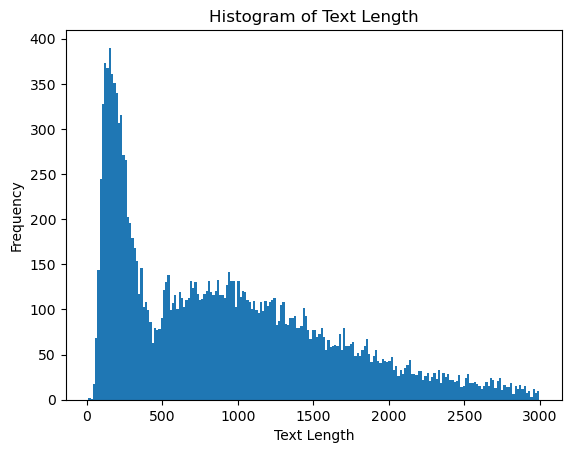

In [13]:
# Initialize a list to store lengths of short_answer and answer texts
lengths = []

# Iterate through the data and collect the lengths
for item in data:
    if item['short_answer']:
        lengths.append(len(item['short_answer']))
    else:
        lengths.append(len(item['answer']))

# Calculate the maximum, minimum, and average text length
max_length = max(lengths) if lengths else 0
min_length = min(lengths) if lengths else 0
avg_length = sum(lengths) / len(lengths) if lengths else 0

# Find the ID of the entity with the maximum length
max_length_entity_id = None
if lengths:
    max_length_entity_id = data[lengths.index(max_length)]['id']

# Find the ID of the entity with the minimum length
min_length_entity_id = None
if lengths:
    min_length_entity_id = data[lengths.index(min_length)]['id']

# Print out the results including IDs
print("Entity with Maximum Text Length (ID:", max_length_entity_id, "):", max_length)
print("Entity with Minimum Text Length (ID:", min_length_entity_id, "):", min_length)
print("Average Text Length:", avg_length)

# Create a histogram of text length
plt.hist(lengths, bins=200)
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Histogram of Text Length')
plt.show()

In [12]:
from collections import Counter

# Extract the 'id_Law' values from 'relevant_laws' for all entities
id_law_values = [law['id_Law'] for item in data for law in item['relevant_laws']]

# Count the occurrences of each 'id_Law'
id_law_counts = Counter(id_law_values)

# Create a DataFrame from the counts
df = pd.DataFrame(id_law_counts.items(), columns=['id_Law', 'Count'])

# Sort the DataFrame by count in descending order
df = df.sort_values(by='Count', ascending=False)

# Display the DataFrame
print(len(df))
print()
print(df)

2018

              id_Law  Count
119     45/2019/QH14    678
5       91/2015/QH13    522
1      100/2015/QH13    485
155     59/2020/QH14    440
179    01/2021/NĐ-CP    285
...              ...    ...
1489  21/2019/TT-BYT      1
1490      130/QĐ-BYT      1
1492  22/2019/TT-BYT      1
339     56/2020/QH14      1
1432  146/2016/NĐ-CP      1

[2018 rows x 2 columns]


Question with Maximum Length (ID: 2809 ): 48
Question with Minimum Length (ID: 2969 ): 6
Average Question Text Length: 19.881952733349248
Answer with Maximum Length (ID: 8129 ): 687
Answer with Minimum Length (ID: 10537 ): 32
Average Answer Text Length: 304.727381236572


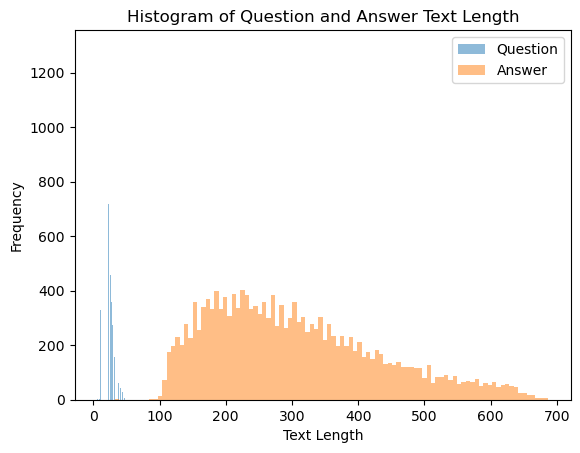

In [3]:
# Calculate the lengths of question texts and store them in a list
question_lengths = [len(item['question'].split()) for item in data]

# Calculate the lengths of answer texts and store them in a list
answer_lengths = [len(item['answer'].split()) for item in data]

# Calculate the maximum, minimum, and average question text length
max_question_length = max(question_lengths)
min_question_length = min(question_lengths)
avg_question_length = sum(question_lengths) / len(question_lengths)

# Calculate the maximum, minimum, and average answer text length
max_answer_length = max(answer_lengths)
min_answer_length = min(answer_lengths)
avg_answer_length = sum(answer_lengths) / len(answer_lengths)

# Find the ID of the question with the maximum length
max_length_question_id = data[question_lengths.index(max_question_length)]['id']

# Find the ID of the question with the minimum length
min_length_question_id = data[question_lengths.index(min_question_length)]['id']

# Find the ID of the answer with the maximum length
max_length_answer_id = data[answer_lengths.index(max_answer_length)]['id']

# Find the ID of the answer with the minimum length
min_length_answer_id = data[answer_lengths.index(min_answer_length)]['id']

# Print out the results including IDs for questions
print("Question with Maximum Length (ID:", max_length_question_id, "):", max_question_length)
print("Question with Minimum Length (ID:", min_length_question_id, "):", min_question_length)
print("Average Question Text Length:", avg_question_length)

# Print out the results including IDs for answers
print("Answer with Maximum Length (ID:", max_length_answer_id, "):", max_answer_length)
print("Answer with Minimum Length (ID:", min_length_answer_id, "):", min_answer_length)
print("Average Answer Text Length:", avg_answer_length)

# Create a histogram for both question and answer text length in the same plot
plt.hist(question_lengths, bins=100, alpha=0.5, label='Question')
plt.hist(answer_lengths, bins=100, alpha=0.5, label='Answer')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Histogram of Question and Answer Text Length')
plt.legend()
plt.show()

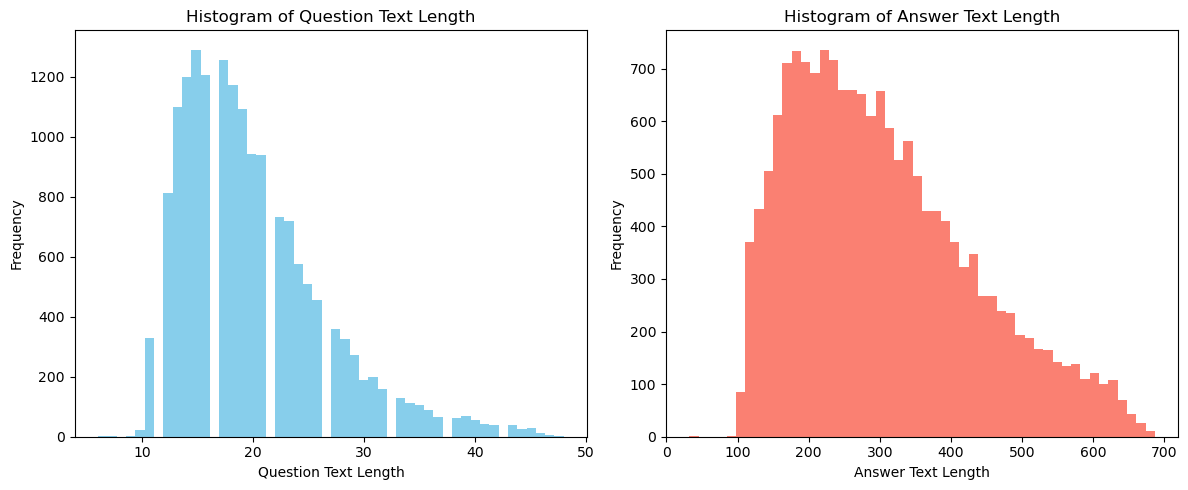

In [4]:
# Calculate the lengths of question texts and store them in a list
question_lengths = [len(item['question'].split()) for item in data]

# Calculate the lengths of answer texts and store them in a list
answer_lengths = [len(item['answer'].split()) for item in data]

# Create subplots with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot histogram for question text length
ax1.hist(question_lengths, bins=50, color='skyblue')
ax1.set_xlabel('Question Text Length')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Question Text Length')

# Plot histogram for answer text length
ax2.hist(answer_lengths, bins=50, color='salmon')
ax2.set_xlabel('Answer Text Length')
ax2.set_ylabel('Frequency')
ax2.set_title('Histogram of Answer Text Length')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()